# Box-Plots

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import HTML, display
from data_mani.visu import *
from prediction.functions import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PREDICTION_MODEL = ['logit', 'ridge', 'lasso', 'enet', 'random_forest', 'lgb', 'nn3']
FS_METHODS = ['all', 'sfi', 'mdi', 'mda', 'granger', 'huang', 'IAMB', 'MMMB']
TICKER_NAMES = ['SPX Index', 'CCMP Index', 'RTY Index', 'SPX Basic Materials', 'SPX Communications',
                'SPX Consumer Cyclical', 'SPX Consumer Non cyclical', 'SPX Energy', 'SPX Financial',
                'SPX Industrial', 'SPX Technology', 'SPX Utilities']
TITLE = 'OOS Cummulative Returns for each Feature Selection Method given a Prediction Model'
BENCHMARK_NAME = 'return_direction'
METRIC_NAME = 'auc'

# Main reference

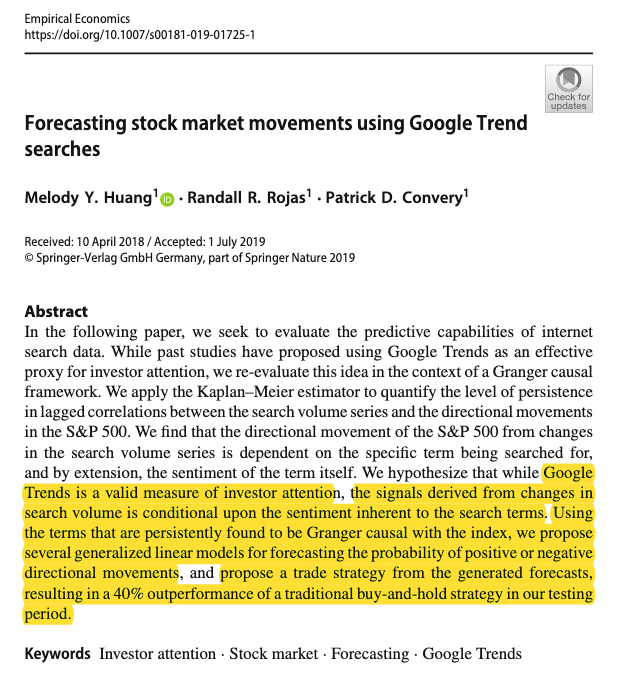

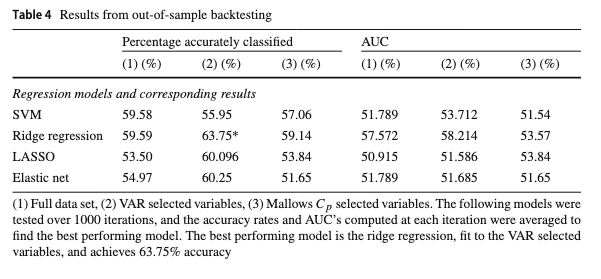

# Our models


## Feature Selection

> 1. All

> 2. Mean decrease impurity (random forest based) - MDI

> 3. Mean decrease accuracy (oos loss of performance; class based) - MDA

> 4. Single feature importance (oos individual feature; reg based) - SFI

> 5. Grenger causality - GRANGER

> 6. Granger causality + Logit - HUANG

> 7. Incremental association Markov boundary - IAMB

> 8. Max-Min Markov boundary - MMMB


## Prediction Models

> 1. Logit

> 2. Ridge regression

> 3. Lasso regression

> 4. Elastic net regression

> 5. Random Forest

> 6. Gradient Boosting

> 7. LSTM neural network (three layer)

## Prediction Setup

> 0. Sample from '2005-01-03' to '2020-12-31'

> 1. Feature selection: '2005-01-03' to '2012-07-03'

> 2. Forecasting: '2012-07-04' to '2020-12-31'

>> a. Random Search

>> b. Predict next year

>> c. Increase sample

# Aggregate prediction results

In [3]:
benchmarks = glob('data/indices/*.csv')
bench_list = []
for b in benchmarks:
    ticker = b.replace('data/indices/', '').replace('.csv', '')
    bench_ret_df = pd.read_csv(b)[3:]
    bench_ret_df.columns = ['date', 'return']
    bench_ret_df = bench_ret_df.melt('date')
    bench_ret_df['model'] = bench_ret_df['ticker'] = ticker
    bench_ret_df['fs'] = 'raw'

    bench_list.append(bench_ret_df)
benchmark_df = pd.concat(bench_list, axis=0)
benchmark_df['value'] = benchmark_df['value'].astype(float)

In [4]:
oos_melt_predictions_df, oos_melt_benchmark_df, oos_melt_auc_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                               fs_models=FS_METHODS,
                                                                                               evaluation_start_date='2012-07-03',
                                                                                               evaluation_end_date='2020-12-31',
                                                                                               ticker_names=TICKER_NAMES,
                                                                                               metric_name=METRIC_NAME,
                                                                                               tag='oos',
                                                                                               benchmark_name=BENCHMARK_NAME)

/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [5]:
is_melt_predictions_df, is_melt_benchmark_df, is_melt_auc_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                            fs_models=FS_METHODS,
                                                                                            evaluation_start_date='2005-01-03',
                                                                                            evaluation_end_date='2012-07-03',
                                                                                            ticker_names=TICKER_NAMES,
                                                                                            metric_name=METRIC_NAME,
                                                                                            tag='is',
                                                                                            benchmark_name=BENCHMARK_NAME)

/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [6]:
oos_pred_ret_df, oos_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=oos_melt_predictions_df,
                                                                         class_threshold=0.5,
                                                                         target_asset_returns=benchmark_df)

is_pred_ret_df, is_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=is_melt_predictions_df,
                                                                       class_threshold=0.5,
                                                                       target_asset_returns=benchmark_df)

## AUC Plots

In [7]:
oos_auc_tb, oos_agg_fs_auc_tb, oos_agg_fore_auc_tb = plot_df_to_table(df=oos_melt_auc_df,
                                                                      index=['ticker', 'fs'],
                                                                      columns=['model'],
                                                                      values=['oosauc'],
                                                                      apply_factor_to_table=100)

is_auc_tb, is_agg_fs_auc_tb, is_agg_fore_auc_tb = plot_df_to_table(df=is_melt_auc_df,
                                                                   index=['ticker', 'fs'],
                                                                   columns=['model'],
                                                                   values=['isauc'],
                                                                   apply_factor_to_table=100)

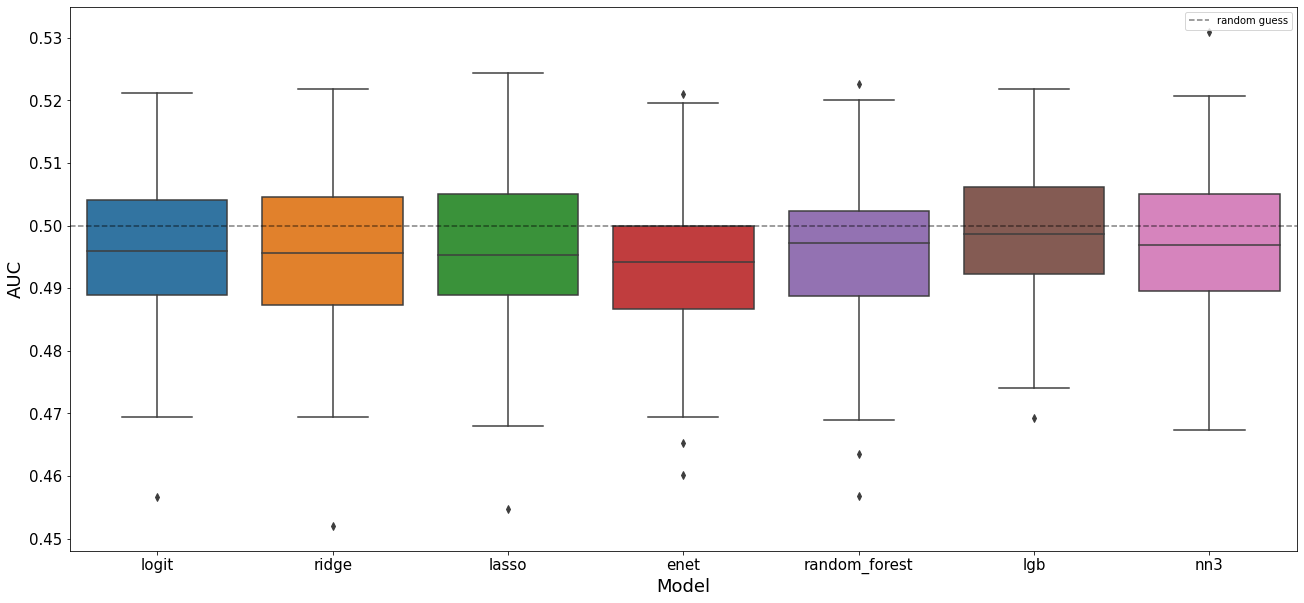

In [8]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='oosauc',data=oos_melt_auc_df, ax=ax, order=PREDICTION_MODEL);
ax.set_ylabel("AUC", fontsize=18);
ax.set_xlabel("Model", fontsize=18);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/auc_model.png')

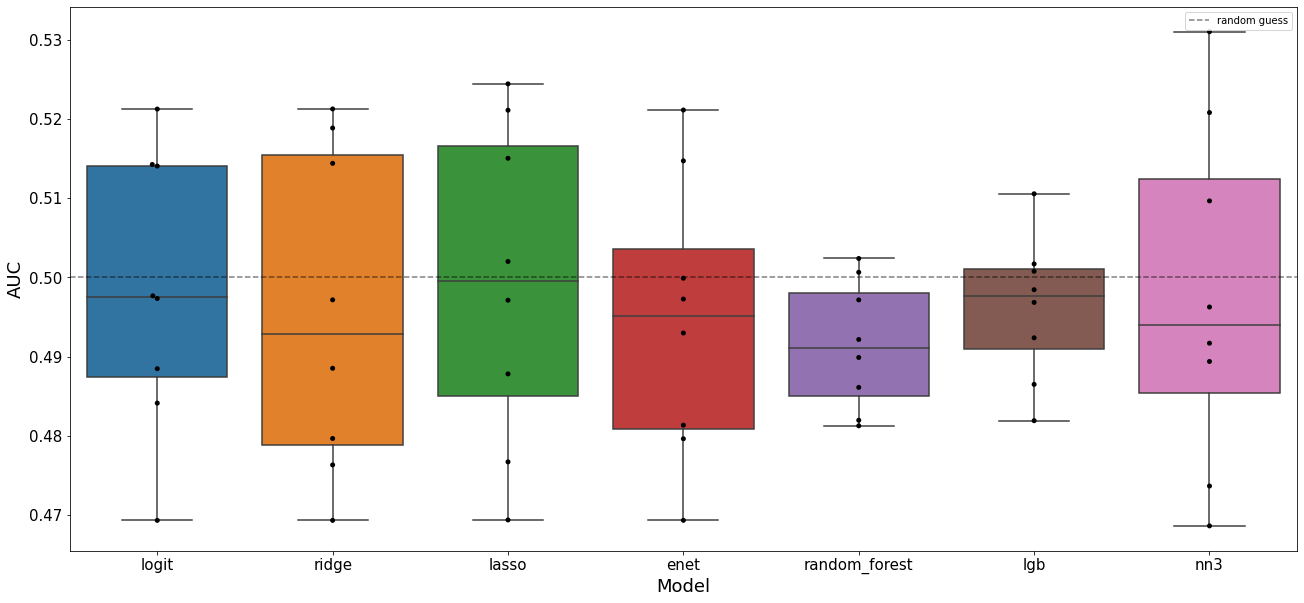

In [9]:
cut_sp = oos_melt_auc_df.loc[oos_melt_auc_df["ticker"]=="SPX Index"]
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='oosauc',data=cut_sp, ax=ax, order=PREDICTION_MODEL);
sns.swarmplot(x="model", y='oosauc', data=cut_sp,ax=ax, color="k",order=PREDICTION_MODEL)
ax.set_ylabel("AUC", fontsize=18);
ax.set_xlabel("Model", fontsize=18);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/auc_SPX_model.png')

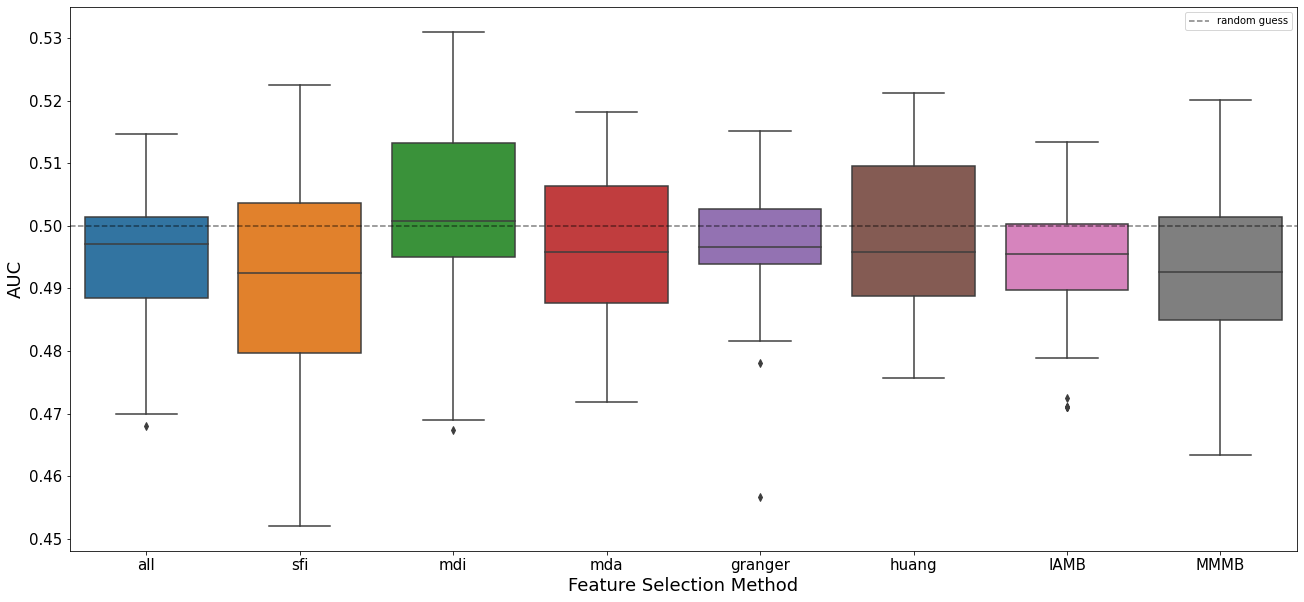

In [10]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="fs", y='oosauc',data=oos_melt_auc_df, ax=ax, order=FS_METHODS);
ax.set_ylabel("AUC", fontsize=18);
ax.set_xlabel("Feature Selection Method", fontsize=18);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/auc_fs.png')

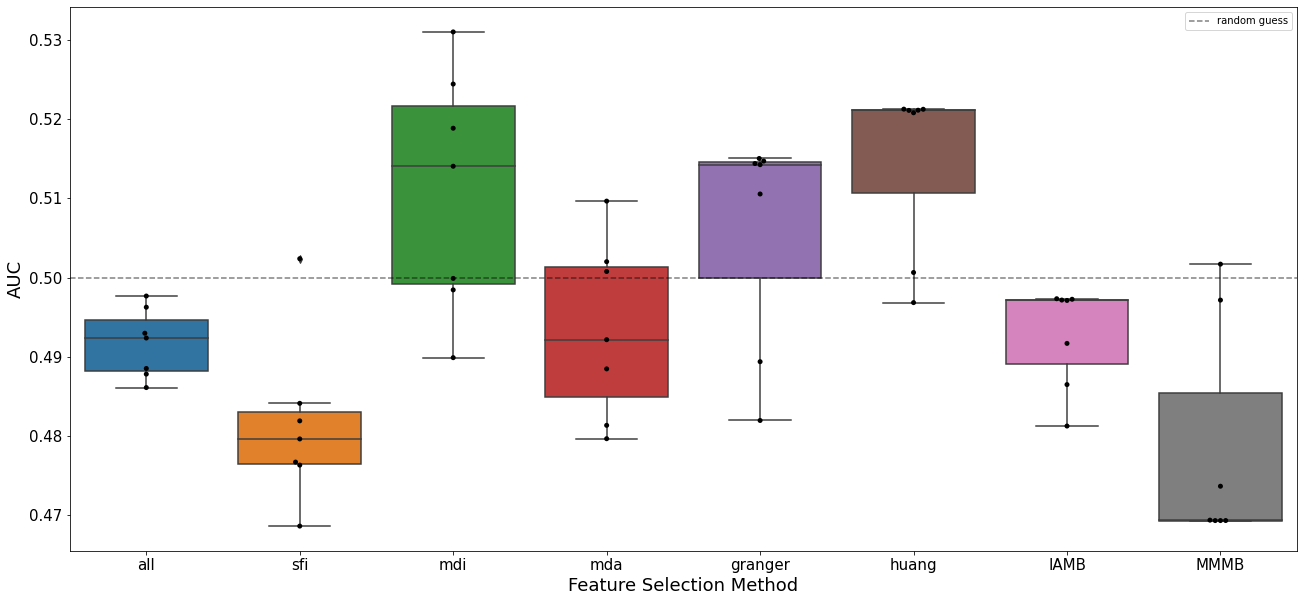

In [11]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="fs", y='oosauc',data=cut_sp, ax=ax, order=FS_METHODS);
sns.swarmplot(x="fs", y='oosauc', data=cut_sp,ax=ax, color="k",order=FS_METHODS)
ax.set_ylabel("AUC", fontsize=18);
ax.set_xlabel("Feature Selection Method", fontsize=18);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/auc_SPX_fs.png')

# Sharpe ratio Plots

In [12]:
ret_all_df = pd.concat([oos_pred_ret_df, benchmark_df], axis=0)
pivot_ret_all_df = ret_all_df.pivot_table(index=['date'], columns=['variable', 'ticker', 'model', 'fs'], values=['value'])

sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df,
                                                  level_to_subset='fs',
                                                  rf=.0)

sr_dist = sr_rank_df.reset_index()
sr_cut_sp = sr_dist.loc[sr_dist["ticker"]=="SPX Index"]


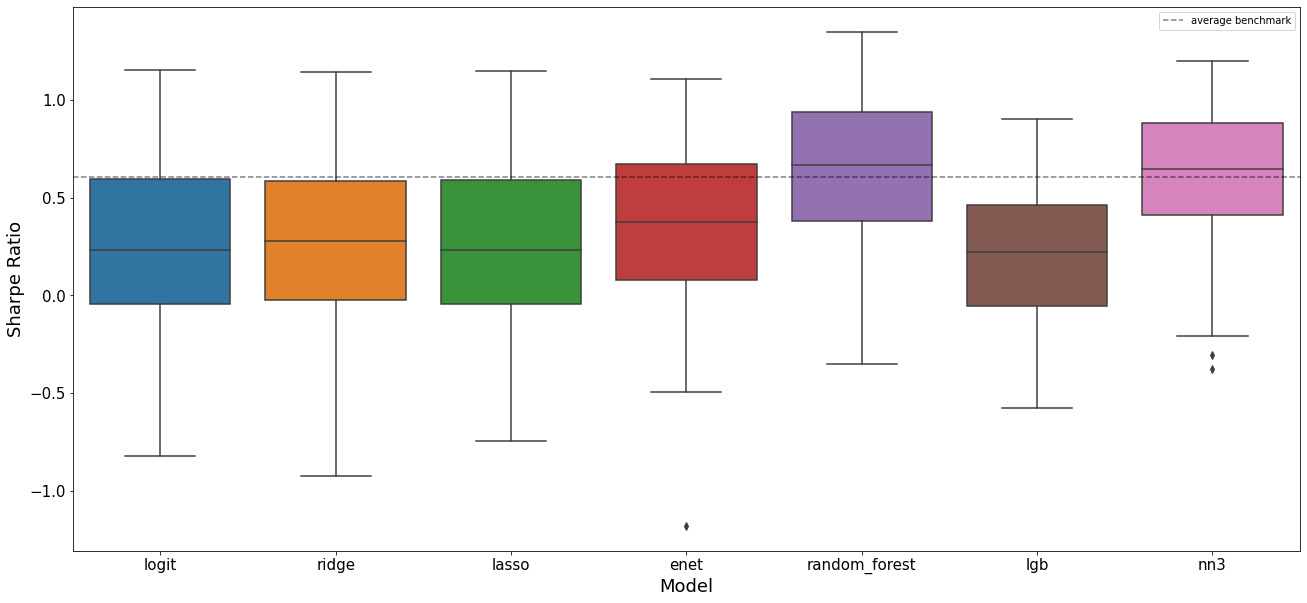

In [13]:
new = sr_rank_df.reset_index()
mean = new.loc[new['fs']=="raw"]
mean_sr = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[["model", "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='sharpe ratio',data=new, ax=ax, order=PREDICTION_MODEL);
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Model", fontsize=18);
ax.axhline(y=mean_sr, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/sr_model.png')

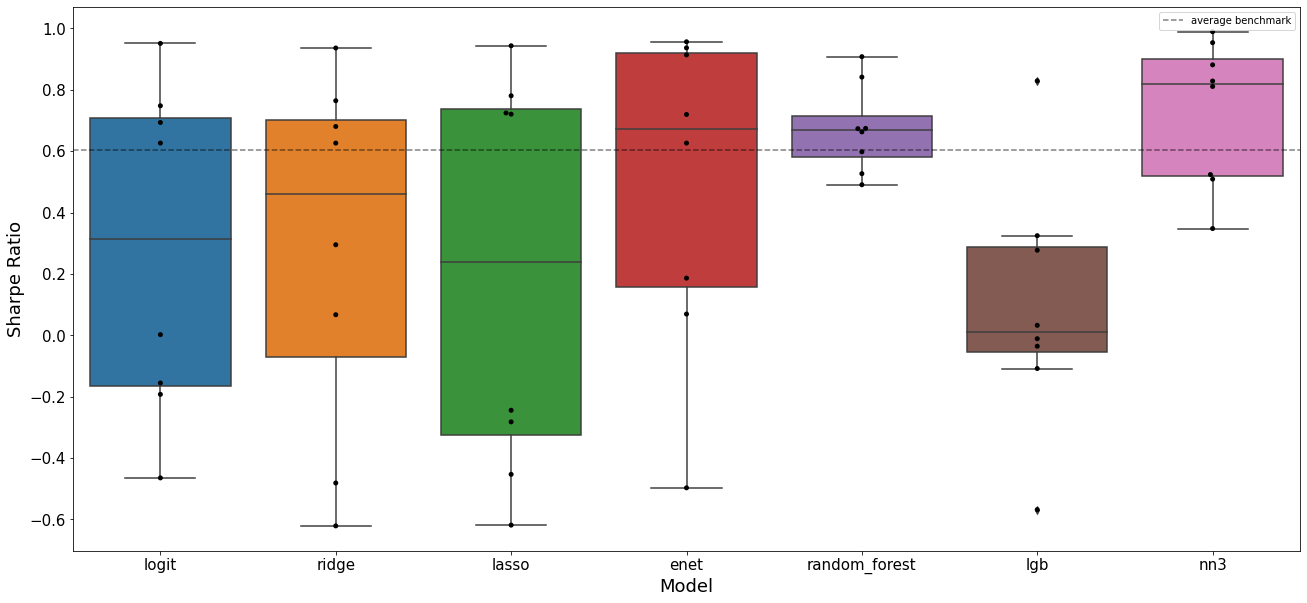

In [14]:
new = sr_cut_sp.reset_index()
mean = new.loc[new['fs']=="raw"]
mean = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[["model", "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='sharpe ratio',data=new, ax=ax, order=PREDICTION_MODEL);
sns.swarmplot(x="model", y='sharpe ratio', data=new,ax=ax, color="k",order=PREDICTION_MODEL)
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Model", fontsize=18);
ax.axhline(y=mean_sr, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/sr_SPX_model.png')

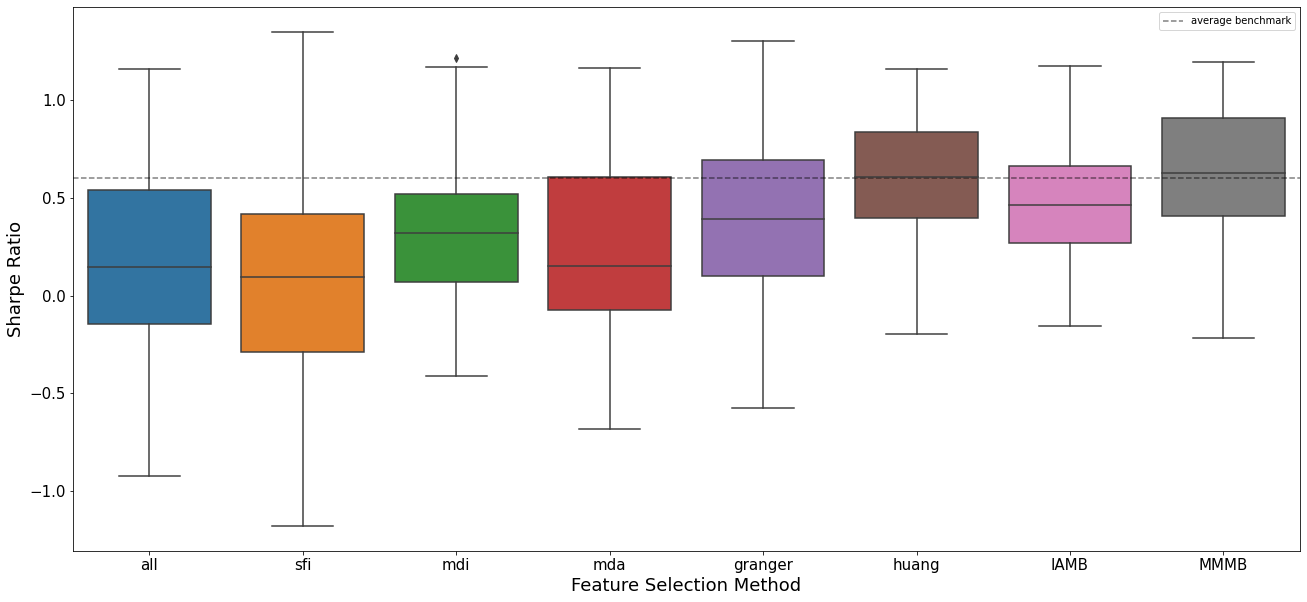

In [15]:
new = sr_rank_df.reset_index()
mean = new.loc[new['fs']=="raw"]
mean = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[['fs', "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)


fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x='fs', y='sharpe ratio',data=new, ax=ax, order=FS_METHODS);
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Feature Selection Method", fontsize=18);
ax.axhline(y=mean, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/sr_fs.png')

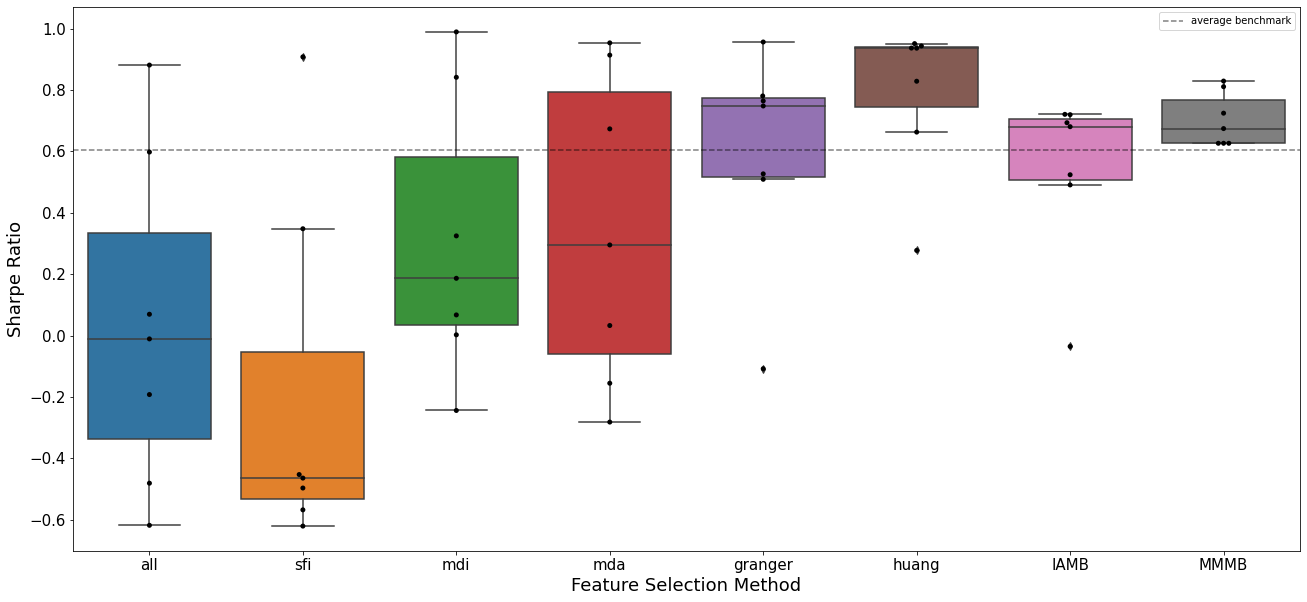

In [16]:
new = sr_cut_sp.reset_index()
mean = new.loc[new['fs']=="raw"]
mean = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[['fs', "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)


fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x='fs', y='sharpe ratio',data=new, ax=ax, order=FS_METHODS);
sns.swarmplot(x="fs", y='sharpe ratio', data=new,ax=ax, color="k", order=FS_METHODS)
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Feature Selection Method", fontsize=18);
ax.axhline(y=mean_sr, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");
fig.savefig('img/sr_SPX_fs.png')

In [17]:
print("average benchmark SR = {:.3f}".format(mean_sr))

average benchmark SR = 0.604
